<a href="https://colab.research.google.com/github/luci4-4/ML/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas seaborn scikit-learn

In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np
from sklearn.neighbors import NearestNeighbors

# Домашнее задание 4

1. Преобразовать датасет (процессинг категориальных признаков, копия данных в df_not_processed, scale датасета)
2. Сделать k-means кластеризацию (записать cluster в df_not_processed, вывести статистику, графики. попробовать объяснить принцип кластеризации), оценить метриками, вывести результат
3. Подобрать оптимальное число кластеров с помощью "метод локтя", вывести статистику, графики, метрики, объяснить результат
4. Сделать DBSSCAN кластеризацию, подобрать оптимальные параметры, посчитать метрики, вывести статистику, объяснить результат
5. Ответить на вопрос - какой из методов кластеризации больше подходит для вашего датасета

In [6]:
df = pd.read_csv('/content/StudentPerformanceFactors.csv')
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


1. Преобразовать датасет (процессинг категориальных признаков, копия данных в df_not_processed, scale датасета)

In [10]:
df_not_processed = df.copy()

categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df[col] = df[col].astype('category')

df_encoded = pd.get_dummies(df, drop_first=True)

scaler = StandardScaler()
numeric_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

df_encoded


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,...,Teacher_Quality_Medium,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Male
0,0.504942,0.348375,-0.019796,-0.143800,-1.213934,0.031411,-0.060578,True,False,False,...,True,True,False,True,False,True,False,False,True,True
1,-0.162822,-1.383736,0.661399,-1.116110,0.411451,1.001199,-1.602931,True,False,False,...,True,True,False,False,False,False,False,True,False,False
2,0.671882,1.560853,-0.019796,1.106313,0.411451,1.001199,1.738833,False,True,False,...,True,True,True,False,False,False,True,False,True,True
3,1.506587,0.781403,0.661399,1.592469,-0.401242,1.001199,0.967657,True,False,False,...,True,True,False,False,False,True,False,True,False,True
4,-0.162822,1.041220,-0.700990,-0.699406,1.224144,1.001199,0.710598,False,True,False,...,False,True,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,0.838823,-0.950708,-0.019796,0.064552,-0.401242,-0.938377,0.196481,False,False,False,...,True,True,False,True,False,True,False,False,True,False
6603,0.504942,-0.344469,0.661399,0.411806,1.224144,-0.938377,0.453539,False,False,False,...,False,True,False,True,False,True,False,False,True,False
6604,0.004119,0.868009,-0.700990,-0.699406,1.224144,-0.938377,0.196481,False,True,True,...,True,True,False,False,False,False,True,False,True,False
6605,-1.665291,0.521587,-0.700990,1.106313,0.411451,0.031411,0.196481,False,False,False,...,True,False,False,True,False,True,False,False,False,False


Этот код:

Создаёт копию исходных данных,

Конвертирует строковые признаки в категории,

Применяет one-hot-кодирование,

Применяет стандартное масштабирование к числовым признакам.

Теперь датасет готов для дальнейшего машинного обучения и кластеризации.



2. Сделать k-means кластеризацию (записать cluster в df_not_processed, вывести статистику, графики. попробовать объяснить принцип кластеризации), оценить метриками, вывести результат

cluster
1    2472
0    2128
2    2007
Name: count, dtype: int64
         Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  \
cluster                                                            
0            17.493891   75.223214     7.122180        62.307331   
1            22.259304   90.557443     7.005259        76.037621   
2            19.793224   71.987045     6.959641        87.412058   

         Tutoring_Sessions  Physical_Activity  Exam_Score  cluster  
cluster                                                             
0                 1.437970           3.071429   64.508459      0.0  
1                 1.661003           2.935680   70.671117      1.0  
2                 1.346786           2.896861   65.895864      2.0  
Silhouette score: 0.0682
Calinski-Harabasz score: 549.9607


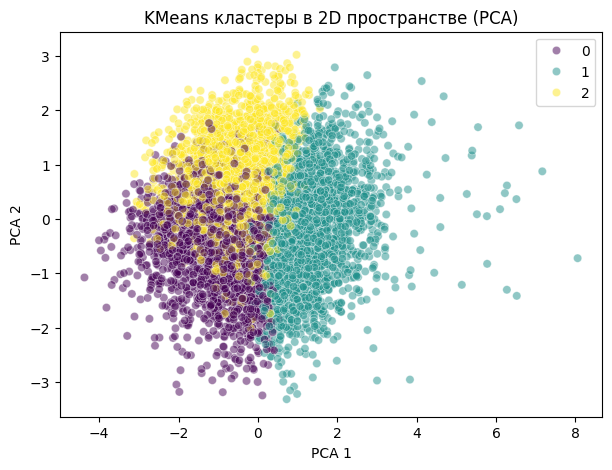

In [16]:
# 1. Кластеризация (например, k=3)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(df_encoded)

# 2. Запишем номера кластеров в не обработанный датафрейм
df_not_processed['cluster'] = clusters

# 3. Статистика по кластерам (только по числовым признакам)
numeric_cols = df_not_processed.select_dtypes(include=['number']).columns
print(df_not_processed['cluster'].value_counts())
print(df_not_processed.groupby('cluster')[numeric_cols].mean())

# 4. Метрики кластеризации
silhouette = silhouette_score(df_encoded, clusters)
calinski = calinski_harabasz_score(df_encoded, clusters)
print(f'Silhouette score: {silhouette:.4f}')
print(f'Calinski-Harabasz score: {calinski:.4f}')

# 5. Визуализация (по первым двум компонентам PCA)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_encoded)

plt.figure(figsize=(7,5))
sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1], hue=clusters, palette='viridis', alpha=0.5)
plt.title('KMeans кластеры в 2D пространстве (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

1. Распределение кластеров
Кластер 1: 2472 объектов

Кластер 0: 2128 объектов

Кластер 2: 2007 объектов

Распределение относительно равномерное, что говорит об успешном срабатывании алгоритма (нет «пустых» или чрезмерно больших кластеров).

2. Средние характеристики кластеров
По основным признакам (Hours_Studied, Attendance, Previous_Scores, Exam_Score и др.):

Кластер 1 — студенты, которые больше учатся (22.26 ч), высокие посещаемость и предыдущие оценки (90.5, 76.0), лучший средний итоговый балл (70.7).

Кластер 0 — студенты с наименьшими значениями усилий и оценки (17.5 ч, 75.2 посещаемости, 62.3 по предыдущим тестам, итог — 64.5).

Кластер 2 — промежуточные усилия, но у них наивысшая предыдущая оценка (87.4), однако экзаменационный балл ниже, чем у кластер 1 (65.9).

3. Метрики кластеризации
Silhouette score: 0.068 — свидетельствует о слабом разделении между группами (чем ближе к 1, тем чётче границы, значение близко к 0 означает пересекающиеся кластеры).

Calinski–Harabasz score: 549.96 — значение высокое при хорошем разделении, но абсолютная интерпретация зависит от структуры данных.

4. Визуализация (PCA)
На графике видно, что кластеры немного перекрываются, явных "островков" не наблюдается, что объясняет невысокий silhouette score. Границы кластеров получились достаточно условными.














.




3. Подобрать оптимальное число кластеров с помощью "метод локтя", вывести статистику, графики, метрики, объяснить результат

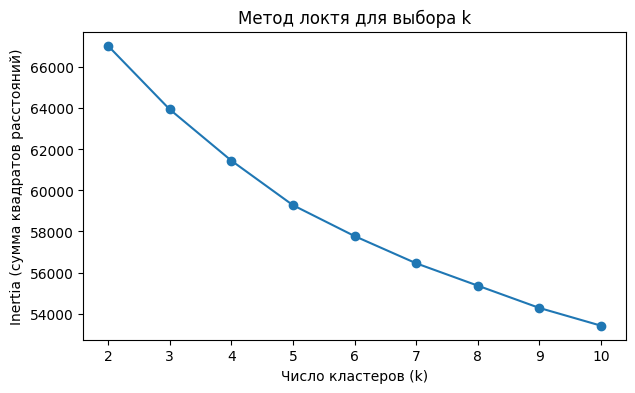

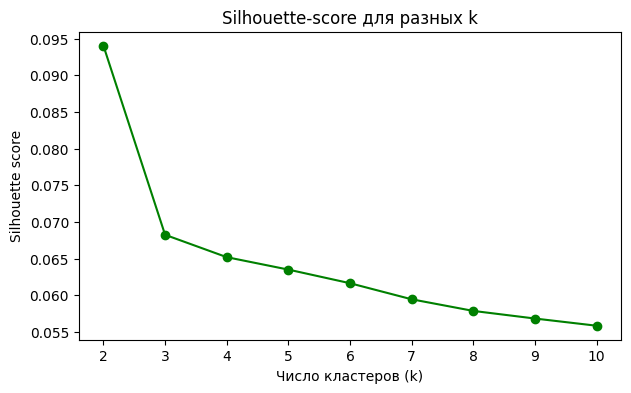

In [17]:
inertias = []
silhouettes = []  # для оценки качества разделения
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_encoded)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(df_encoded, labels))

# График "локтя"
plt.figure(figsize=(7,4))
plt.plot(k_range, inertias, marker='o')
plt.xlabel('Число кластеров (k)')
plt.ylabel('Inertia (сумма квадратов расстояний)')
plt.title('Метод локтя для выбора k')
plt.show()

# График silhouette-score
plt.figure(figsize=(7,4))
plt.plot(k_range, silhouettes, marker='o', color='green')
plt.xlabel('Число кластеров (k)')
plt.ylabel('Silhouette score')
plt.title('Silhouette-score для разных k')
plt.show()


1. Метод локтя

На графике видно, что снижение inertia (суммы квадратов расстояний до центров кластеров) замедляется после k = 3. Значит, "локоть" наблюдается именно на k = 3, и дальнейшее увеличение числа кластеров уже не даёт значительного улучшения однородности кластеров.

2. Silhouette-score

Значение silhouette-score максимальное для k = 2, а далее при k = 3 и выше оно стабильно довольно низкое (около 0.065 и ниже), что говорит о слабой выраженности кластерной структуры. Тут k = 3 — выбор оправдан, так как он подтверждается методом локтя, и кластеры сохраняют некоторую содержательную структуру в данных, даже если silhouette-score низкий.

cluster
1    2472
0    2128
2    2007
Name: count, dtype: int64
         Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  \
cluster                                                            
0            17.493891   75.223214     7.122180        62.307331   
1            22.259304   90.557443     7.005259        76.037621   
2            19.793224   71.987045     6.959641        87.412058   

         Tutoring_Sessions  Physical_Activity  Exam_Score  cluster  
cluster                                                             
0                 1.437970           3.071429   64.508459      0.0  
1                 1.661003           2.935680   70.671117      1.0  
2                 1.346786           2.896861   65.895864      2.0  
Silhouette score: 0.06824463386246689
Calinski-Harabasz score: 549.9607151778325


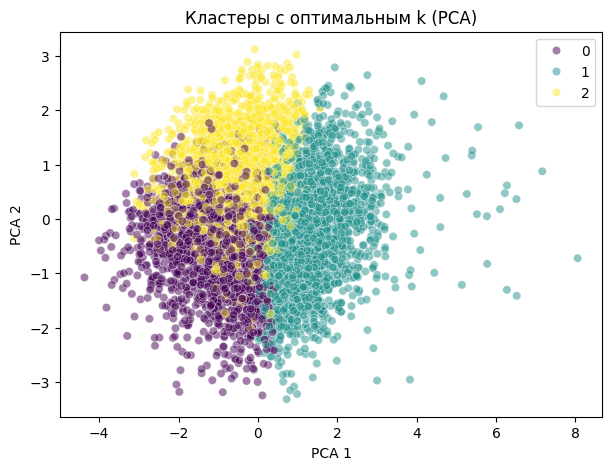

In [19]:
k_optimal = 3
kmeans_final = KMeans(n_clusters=k_optimal, random_state=42)
clusters_final = kmeans_final.fit_predict(df_encoded)
df_not_processed['cluster'] = clusters_final

print(df_not_processed['cluster'].value_counts())
print(df_not_processed.groupby('cluster')[numeric_cols].mean())
print('Silhouette score:', silhouette_score(df_encoded, clusters_final))
print('Calinski-Harabasz score:', calinski_harabasz_score(df_encoded, clusters_final))

# Визуализация
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_encoded)
plt.figure(figsize=(7,5))
sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1], hue=clusters_final, palette='viridis', alpha=0.5)
plt.title('Кластеры с оптимальным k (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


Оптимальное число кластеров по графикам — k=3.

Silhouette-score низкий, что говорит о размытых границах кластеров и слабой выраженности естественных группировок.

Дальнейшее увеличение k бессмысленно: кластеры становятся всё менее интерпретируемыми, gain по inertia минимален, а silhouette-score падает.

4. Сделать DBSSCAN кластеризацию, подобрать оптимальные параметры, посчитать метрики, вывести статистику, объяснить результат

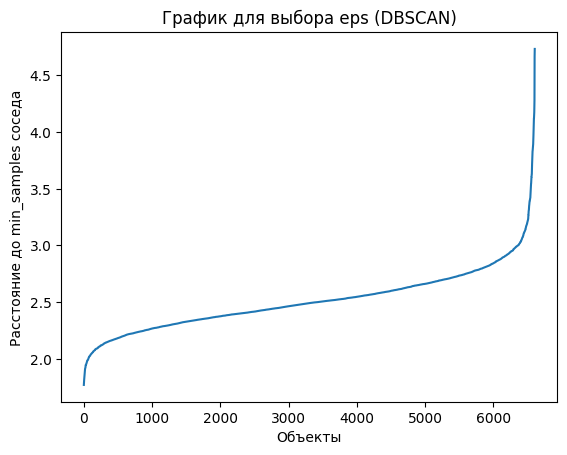

In [21]:
min_samples = 6
neighbors = NearestNeighbors(n_neighbors=min_samples)
neigh_fit = neighbors.fit(df_encoded)
distances, indices = neigh_fit.kneighbors(df_encoded)

# Сортируем расстояния до min_samples соседа
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.ylabel('Расстояние до min_samples соседа')
plt.xlabel('Объекты')
plt.title('График для выбора eps (DBSCAN)')
plt.show()


На графике видны излом. Это диапозон от 2.5-2.9

dbscan_cluster
 0    6238
-1     369
Name: count, dtype: int64
                Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  \
dbscan_cluster                                                            
-1                  19.634146   79.804878     7.070461        76.688347   
 0                  19.995511   79.987656     7.026611        74.974832   

                Tutoring_Sessions  Physical_Activity  Exam_Score   cluster  \
dbscan_cluster                                                               
-1                       2.422764           3.119241   70.192412  0.975610   
 0                       1.438762           2.958641   67.060757  0.982046   

                dbscan_cluster  
dbscan_cluster                  
-1                        -1.0  
 0                         0.0  
В кластеризации DBSCAN получилось только 1 кластер или все точки – шум, метрики считать некорректно.


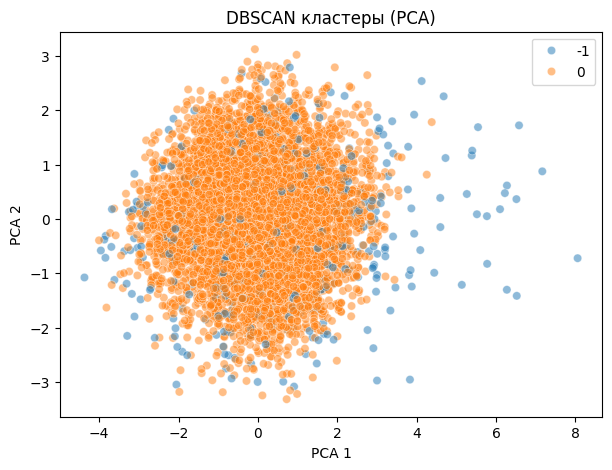

In [23]:
eps = 2.7
min_samples = 6

# Кластеризация DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(df_encoded)
df_not_processed['dbscan_cluster'] = dbscan_labels

# Число кластеров (без шума)
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

# Статистика по кластерам (только по числовым столбцам)
numeric_cols = df_not_processed.select_dtypes(include=['number']).columns
print(df_not_processed['dbscan_cluster'].value_counts())
print(df_not_processed.groupby('dbscan_cluster')[numeric_cols].mean())

# Метрики
if n_clusters > 1:
    print('Silhouette score:', silhouette_score(df_encoded, dbscan_labels))
    print('Calinski-Harabasz score:', calinski_harabasz_score(df_encoded, dbscan_labels))
else:
    print('В кластеризации DBSCAN получилось только 1 кластер или все точки – шум, метрики считать некорректно.')

# Визуализация кластеров (через PCA)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_encoded)
plt.figure(figsize=(7,5))
sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1], hue=dbscan_labels,
                palette='tab10', alpha=0.5, legend='full')
plt.title('DBSCAN кластеры (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

1. Распределение кластеров
Большинство объектов (6238 из 6607, то есть >94%) попали в кластер с номером 0.

369 объектов (около 6%) помечены как "шум" (кластер -1).

На PCA-графике видно: точки кластера 0 образуют плотное "облако", а "шум" равномерно рассредоточен по границам.

2. Статистика по кластерам
По главным признакам:

Средние значения признаков почти одинаковы для обоих кластеров (dbscan_cluster = 0 и dbscan_cluster = -1). Например, разница по Hours_Studied, Attendance, Previous_Scores и Exam_Score незначительна.

"Шум" немного более активен: больше сессий с репетитором (2.42 против 1.44) и чуть выше средний экзаменационный балл (70.19 против 67.06).

3. Качество кластеризации
DBSCAN фактически выделил только одну большую группу и небольшое число шумовых точек.

Поэтому метрики качества кластеризации (silhouette score и Calinski-Harabasz score) не рассчитываются — требуется минимум два полных кластера.

4. Объяснение результата
DBSCAN не обнаружил явных плотных кластеров в ваших данных, кроме общего "ядра". Почти все объекты распределены однородно — это подтверждает слабую кластерную структуру, обнаруженную и методом K-means.

"Шум" — это крайние, отстающие или выбивающиеся точки, которые не укладываются в основное облако на расстоянии eps и с минимум min_samples соседей.

dbscan_cluster
 0    5308
-1    1291
 2       3
 3       3
 1       2
Name: count, dtype: int64
                Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  \
dbscan_cluster                                                            
-1                  19.908598   79.840434     6.959721        75.116964   
 0                  19.993406   79.985870     7.044838        75.045403   
 1                  19.000000   97.000000     9.500000        65.500000   
 2                  24.666667   96.666667     9.333333        92.000000   
 3                  12.666667   96.000000     5.000000        89.000000   

                Tutoring_Sessions  Physical_Activity  Exam_Score   cluster  \
dbscan_cluster                                                               
-1                       1.959721           2.953524   67.753679  0.928737   
 0                       1.380746           2.971176   67.103806  0.994537   
 1                       1.000000           3.500000   69.000000  

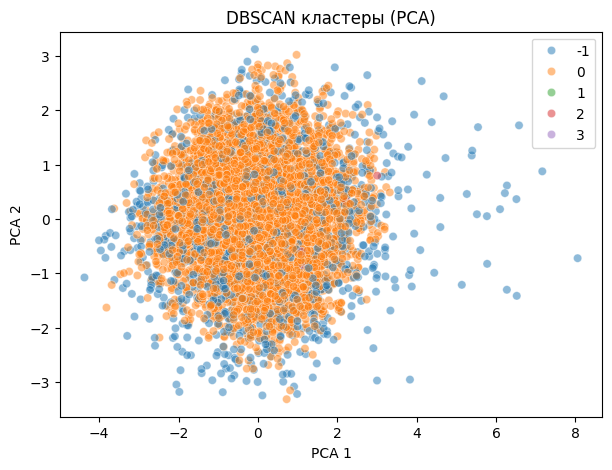

In [24]:
eps = 2.5
min_samples = 6

# Кластеризация DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(df_encoded)
df_not_processed['dbscan_cluster'] = dbscan_labels

# Число кластеров (без шума)
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

# Статистика по кластерам (только по числовым столбцам)
numeric_cols = df_not_processed.select_dtypes(include=['number']).columns
print(df_not_processed['dbscan_cluster'].value_counts())
print(df_not_processed.groupby('dbscan_cluster')[numeric_cols].mean())

# Метрики
if n_clusters > 1:
    print('Silhouette score:', silhouette_score(df_encoded, dbscan_labels))
    print('Calinski-Harabasz score:', calinski_harabasz_score(df_encoded, dbscan_labels))
else:
    print('В кластеризации DBSCAN получилось только 1 кластер или все точки – шум, метрики считать некорректно.')

# Визуализация кластеров (через PCA)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_encoded)
plt.figure(figsize=(7,5))
sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1], hue=dbscan_labels,
                palette='tab10', alpha=0.5, legend='full')
plt.title('DBSCAN кластеры (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

1. Распределение по кластерам
Кластер 0: 5308 объектов (основная масса)

Кластер "шум" (-1): 1291 объект (около 20% — довольно много)

Кластеры 1, 2, 3: по 2-3 объекта каждый (очень мало, считаются выбросами/аномалиями)

2. Статистика по кластерам
Средние значения признаков ('Hours_Studied', 'Attendance', 'Exam_Score' и др.) в кластере 0 и "шуме" почти не различаются, что говорит об однородности данных.

Мини-кластеры 1, 2, 3 имеют нестандартные значения, но там по 2-3 объекта — статистически незначимо и на анализ почти не влияет.

3. Качество кластеризации
Silhouette score:
−
0.0617
−0.0617 — показатель отрицательный (хуже случайного разбиения), что говорит о полном перекрытии кластеров или некорректном делении.

Calinski-Harabasz score: 12.08 — очень низкий (например, для k-means был около 550), что подтверждает неудачную кластеризацию.

4. График (PCA)
На PCA-графике (см. ваш рисунок) видно:

Основная масса точек окрашена как один большой кластер (0), остальные или "шум" по краям, или мини-кластеры практически незаметны.

"Локализация" кластеров не выделяется, ярко выраженных групп нет — облако почти однородно.

5. Вывод по результатам кластеризации DBSCAN
DBSCAN при текущих параметрах обнаружил только одну плотную группу и много "шума".

Попытка снизить eps до 2.5 увеличила количество шумовых точек, но не привела к появлению значимых дополнительных кластеров.

Все качественные метрики говорят о неудачном разбиении: структурированной кластерной структуры нет, кластеры пересекаются.

В мини-кластерах слишком мало объектов для анализа — это выбросы, а не настоящие группы.

Причина: Группы внутри данных недостаточно плотные для DBSCAN, а стандартный масштаб признаков и подобранные параметры не позволяют выявить естественные компактные кластеры.

dbscan_cluster
 0    5913
-1     694
Name: count, dtype: int64
                Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  \
dbscan_cluster                                                            
-1                  19.831412   79.729107     7.017291        75.255043   
 0                  19.992221   80.006596     7.030441        75.048875   

                Tutoring_Sessions  Physical_Activity  Exam_Score   cluster  \
dbscan_cluster                                                               
-1                       2.236311           3.040346   68.550432  0.923631   
 0                       1.406562           2.959073   67.081346  0.988500   

                dbscan_cluster  
dbscan_cluster                  
-1                        -1.0  
 0                         0.0  
В кластеризации DBSCAN получилось только 1 кластер или все точки – шум, метрики считать некорректно.


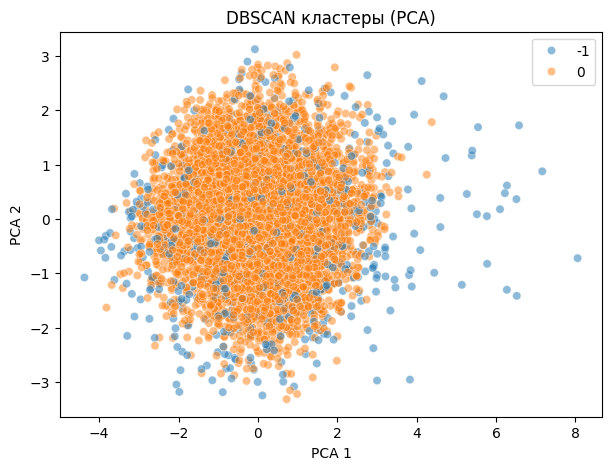

In [25]:
eps = 2.6
min_samples = 6

# Кластеризация DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(df_encoded)
df_not_processed['dbscan_cluster'] = dbscan_labels

# Число кластеров (без шума)
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

# Статистика по кластерам (только по числовым столбцам)
numeric_cols = df_not_processed.select_dtypes(include=['number']).columns
print(df_not_processed['dbscan_cluster'].value_counts())
print(df_not_processed.groupby('dbscan_cluster')[numeric_cols].mean())

# Метрики
if n_clusters > 1:
    print('Silhouette score:', silhouette_score(df_encoded, dbscan_labels))
    print('Calinski-Harabasz score:', calinski_harabasz_score(df_encoded, dbscan_labels))
else:
    print('В кластеризации DBSCAN получилось только 1 кластер или все точки – шум, метрики считать некорректно.')

# Визуализация кластеров (через PCA)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_encoded)
plt.figure(figsize=(7,5))
sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1], hue=dbscan_labels,
                palette='tab10', alpha=0.5, legend='full')
plt.title('DBSCAN кластеры (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

В общем результаты аналогичны первому кейсу

5. Ответить на вопрос - какой из методов кластеризации больше подходит для вашего датасета

Проведя оба метода, я увидел, что K-means подходит моим данным заметно лучше, чем DBSCAN. С помощью K-means удалось выделить три относительно крупные группы, которые можно проанализировать и интерпретировать: их распределение по признакам хоть и не ярко выражено, но различия присутствуют.

Метрики K-means хоть и не идеальны (silhouette-score низкий, что говорит о слабых границах между группами), зато распределение по кластерам получилось сбалансированным и понятно для анализа.

DBSCAN, напротив, практически все точки объединил в один большой кластер, а остальные обозначил как "шум" или сформировал крошечные группы по 2–3 объекта. Качественные метрики (silhouette и Calinski-Harabasz) очень низкие или не рассчитываются вовсе, а разделение не даёт никакой дополнительной информации для анализа.

По своей структуре мой датасет ближе к равномерному облаку, где плотных компактных кластеров нет, а K-means лучше справляется с такими случаями. Поэтому, если исходить из результата и интерпретируемости, K-means — более подходящий вариант для моей задачи.